<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/parameter_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import beta

from matplotlib.pyplot import plot, fill_between, vlines, hlines

90 percent confidence interval 0.006804714122615158  to  0.00822328065362432
mean:  0.0075  median:  0.007491793171661221


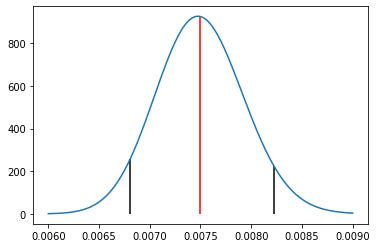

In [17]:
rv = beta(300, 39700)

[fifthPercentile, ninetyFithPercentile] = rv.ppf([0.05, 0.95])
print('90 percent confidence interval', fifthPercentile, ' to ', ninetyFithPercentile)
median = rv.median()
print('mean: ', rv.mean(), ' median: ', median)
ps = np.linspace(0.006, 0.009, 200)
plot(ps, rv.pdf(ps))
vlines(fifthPercentile, 0, rv.pdf(fifthPercentile))
vlines(median, 0, rv.pdf(median), colors='red')
vlines(ninetyFithPercentile, 0, rv.pdf(ninetyFithPercentile))


Probability  0.006804714122615158  < p <  0.00822328065362432  =  0.9000000000000353


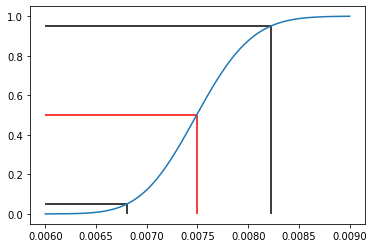

In [24]:
print('Probability ', fifthPercentile, ' < p < ', ninetyFithPercentile, ' = ', rv.cdf(ninetyFithPercentile) - rv.cdf(fifthPercentile))

plot(ps, rv.cdf(ps))
hlines(0.05, 0.006, fifthPercentile)
vlines(fifthPercentile, 0, 0.05)

hlines(0.5, 0.006, median, colors='red')
vlines(median, 0, 0.5, colors='red')

hlines(0.95, 0.006, ninetyFithPercentile)
vlines(ninetyFithPercentile, 0, 0.95)